#**FINANCE CASPTONE PROJECCT**



  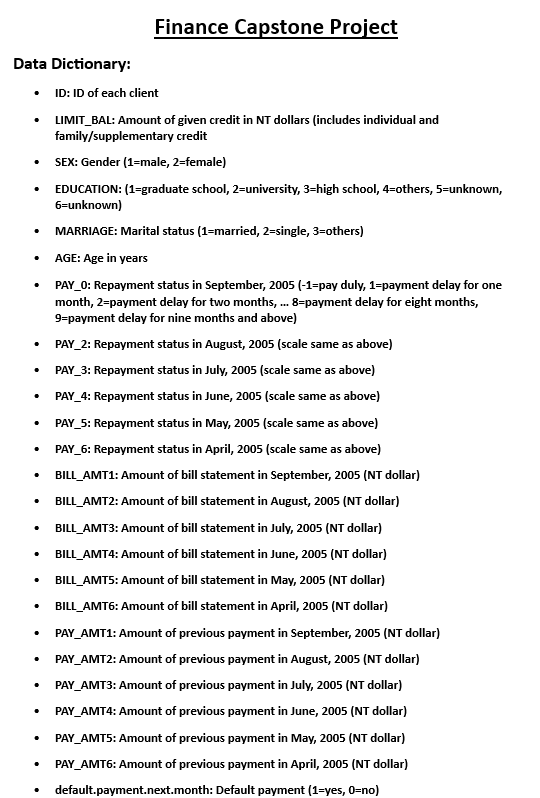

# **PROBLEM STATEMENT**
A leading financial institution wants to predict whether a customer will default on their credit card payment in the next month. Credit card defaults can cause significant financial losses, so accurately identifying high-risk customers in advance allows the company to take proactive measures such as adjusting credit limits, offering financial counseling, or implementing stricter credit policies.
You have been provided with historical credit card data of 30,000 customers, including demographic details, credit limits, past payment behaviors, and bill/payment amounts.


# 1ST WE IMPORT NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


0 - people who are not default ( majority class)


---



---



---


1 - people who are default ( minority class)

In [ ]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.nunique()

,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11


# EXPLORATORY DATA ANALYSIS

In [ ]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


**DRAW** **HEATMAP**


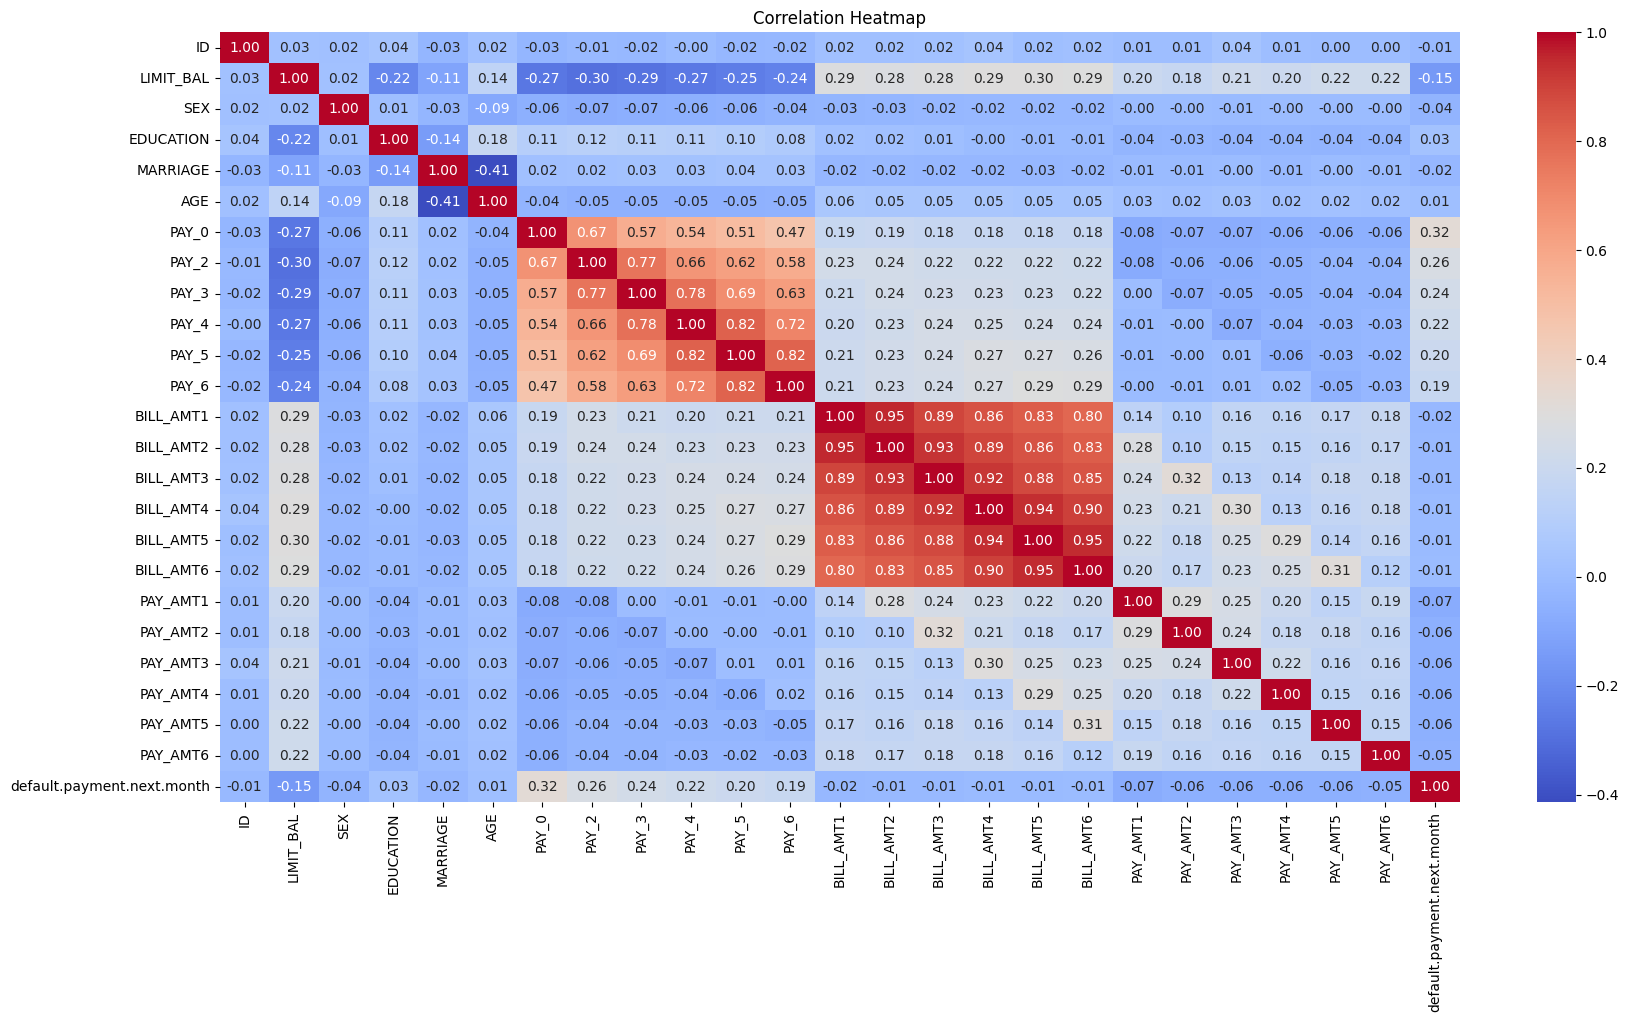

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

WE CAN SEE BY OUR HEATMAP THAT THE CORRELATION OF (DEFAULT.PAYMENT.NEXT.MONTH) IS POSSITIVELY CORELATED WITH pay_0,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6 that means customer who have bad past payment ( who have higher values in pay_columns means delay in payment) there chances to do the default are more


---

limit_bal have negative correlation with deafault(-0.15) means customer who have more credit limit have less chances to do the default



---
sex,education,marriage,age,bill_amt features correlation is more with default



---

we can se that bill_amt columns are stongly correlated
and this is also expected because these are bill amount of consecituve months


---
sililarly pay columns(payment status) are also strongly correlated

# CONCLUSION OF HEATMAP
by heatmap it is clear that pay columns are best to predict the defaults and important as well



# now we going to study our important paycolumns

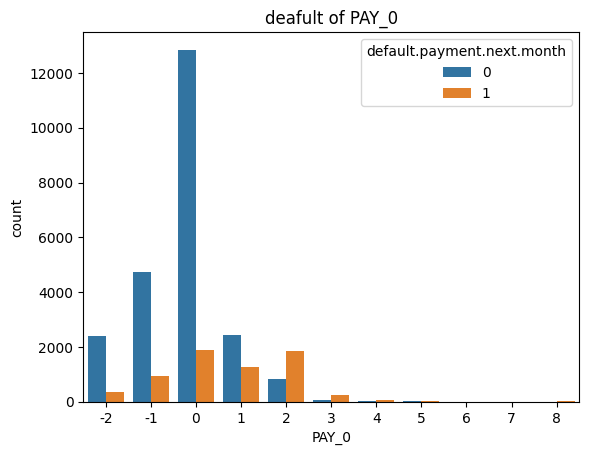

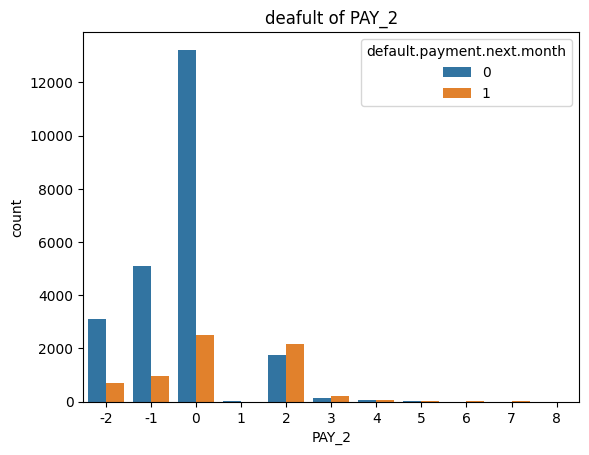

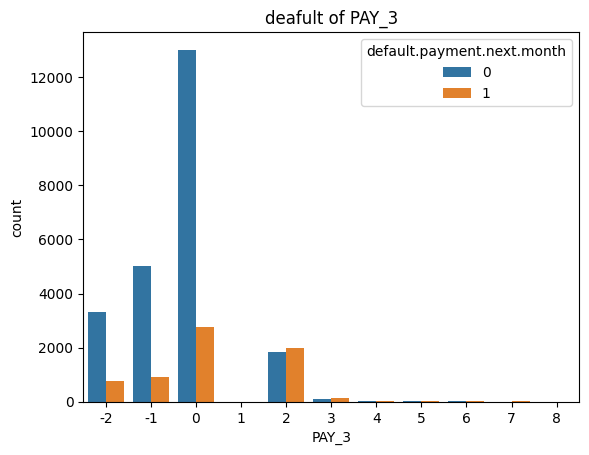

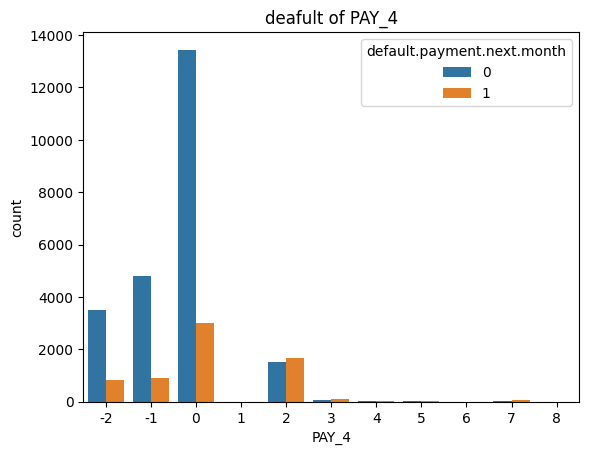

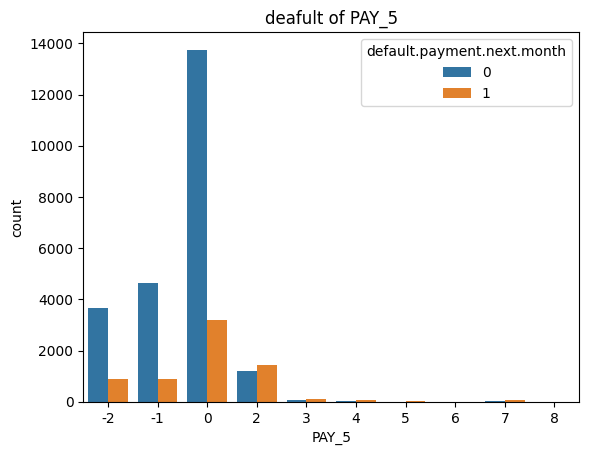

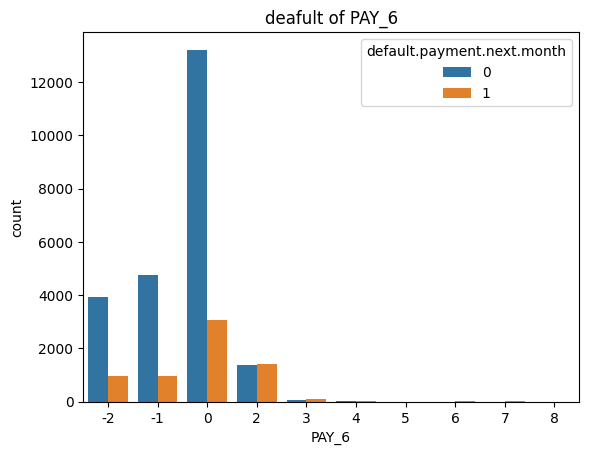

In [ ]:
payment_history_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in payment_history_columns:
  sns.countplot(x=col, data=df,hue = 'default.payment.next.month')
  plt.title(f'deafult of {col}')
  plt.show()

# NOW WE GOING TO CHEACK THE DISTRIBUTION OF THE BILL_AMT AND PAY_AMT


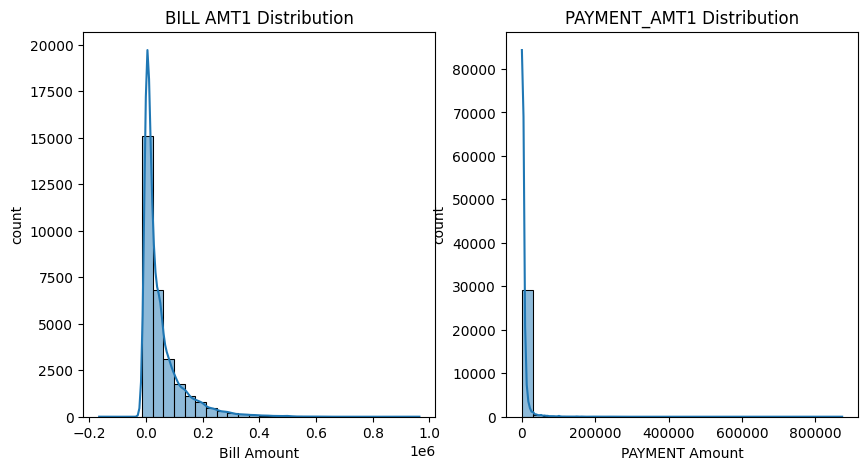

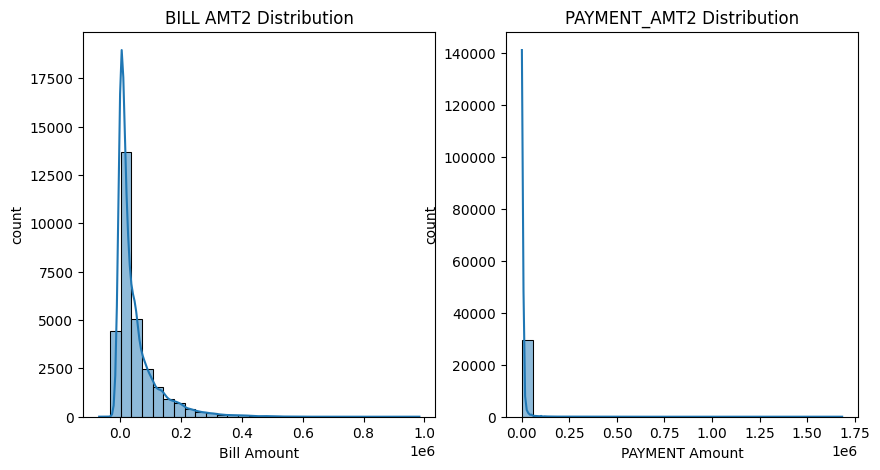

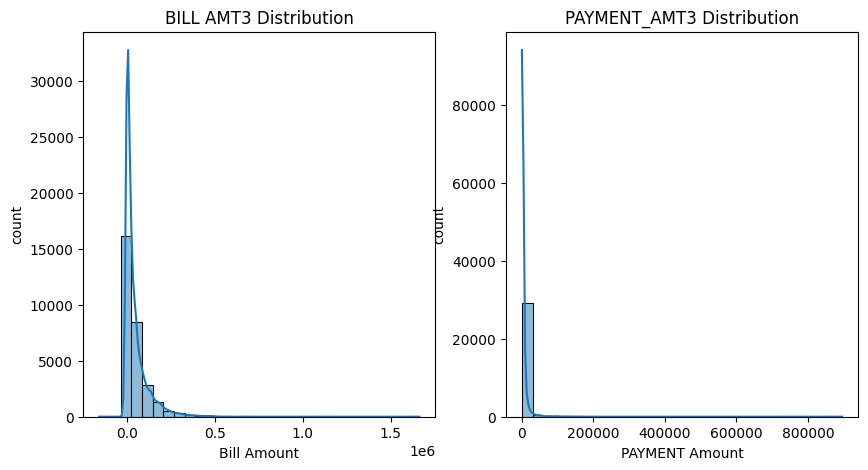

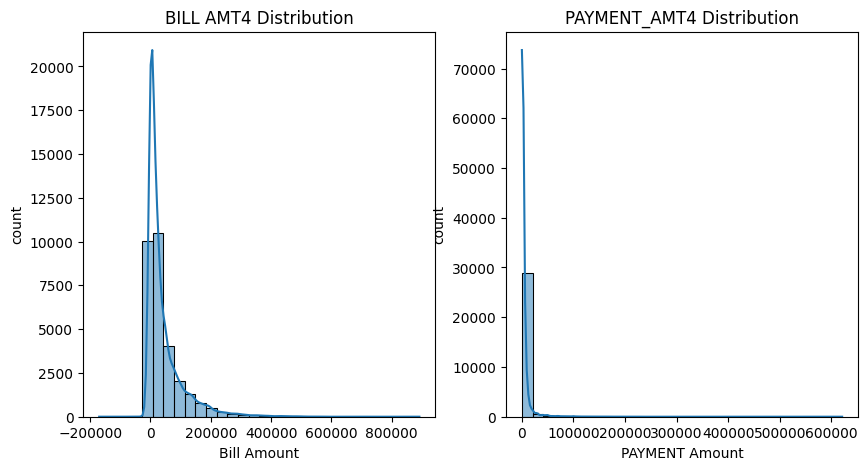

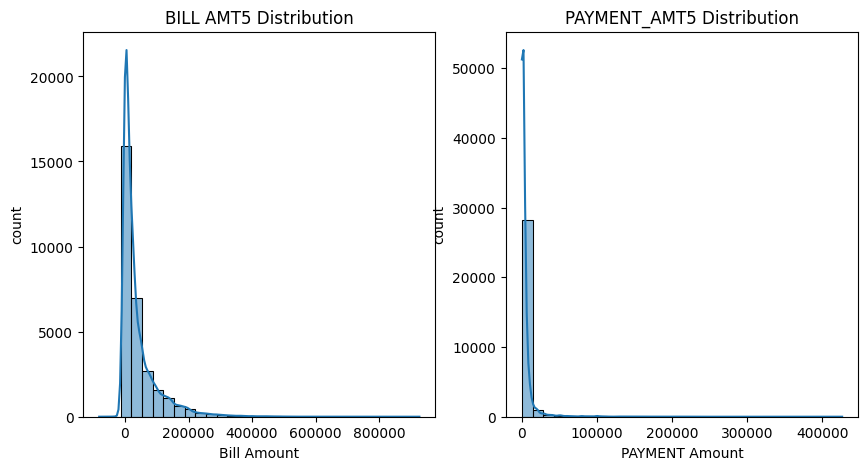

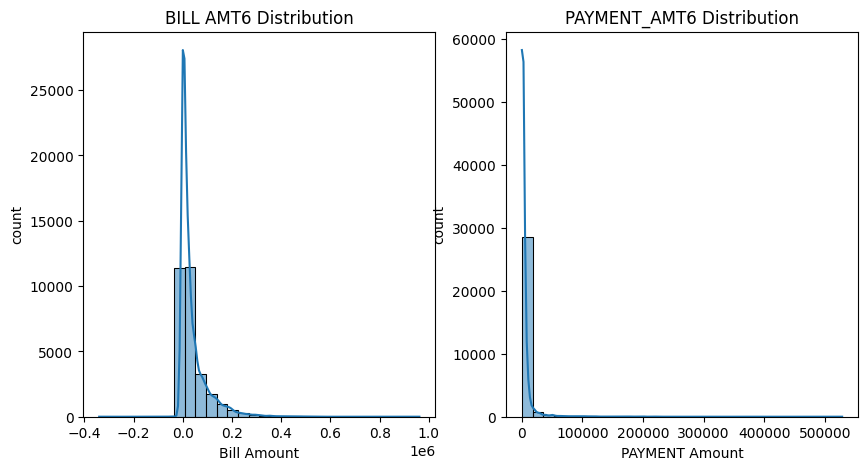

In [ ]:
for i in range (1,7):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.histplot(df[f'BILL_AMT{i}'],bins = 30, kde=True)
  plt.title(f'BILL AMT{i} Distribution')
  plt.xlabel('Bill Amount')
  plt.ylabel('count')
  plt.subplot(1,2,2)

  plt.subplot(1,2,2)
  sns.histplot(df[f'PAY_AMT{i}'],bins = 30, kde=True)
  plt.title(f'PAYMENT_AMT{i} Distribution')
  plt.xlabel('PAYMENT Amount')
  plt.ylabel('count')
  plt.subplot(1,2,2)

  plt.show()

by this graph we can se that most of the bill_amt distribution is right skewed that means most of the people pay less amount of bill and very low number of people pay high amount of bill


---

and for the PAY_AMT we can se that pay_amt dostribution is right skewd that means most oof the people pay less amount and very less number of people pay high amount



---
in the plot one box on peak zero which shows that many people did no payment very less people do payment this liss usefull to identify the defaulters  







# we are going to plot box plot to cheack the outliers for deafulters and non defaulters ages distibution

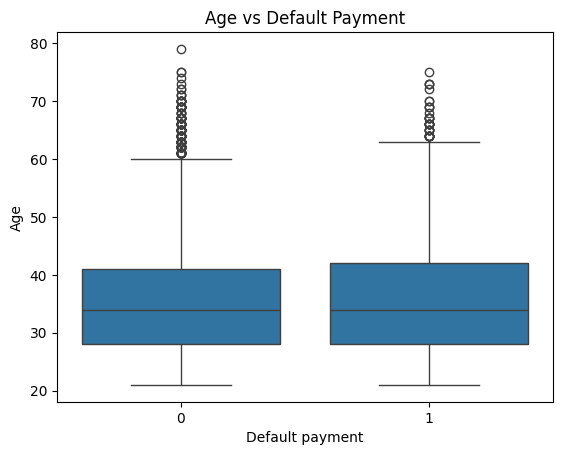

In [ ]:
sns.boxplot(x = 'default.payment.next.month', y = 'AGE', data = df)
plt.title('Age vs Default Payment')
plt.xlabel('Default payment')
plt.ylabel('Age')
plt.show()


the small dots after 60 are outliers





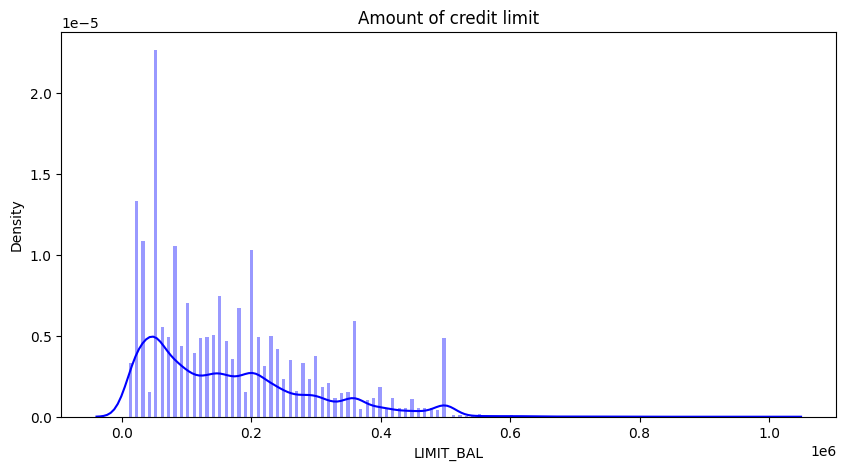

In [ ]:
# lets plot density plot for limited balance
plt.figure(figsize=(10,5))
plt.title("Amount of credit limit")
sns.distplot(df['LIMIT_BAL'],kde = True,bins = 200,color= 'blue') # kde (kernal density estimator) ( it draw distribution line wich shows the smoothness of curve)
plt.show()

this density plot shows that uper peak of the graph shows that means most of the people in dataset are those whom credit limit is low


---
the long right tail shows that very low number of people have more credit limit


---
this data is skwed that shows it is not normaly distributed it is skwed on right side



now i cheack in limit column which value comes most of the time

In [ ]:
df['LIMIT_BAL'].value_counts().head()

,count
LIMIT_BAL,
50000.0,3365
20000.0,1976
30000.0,1610
80000.0,1567
200000.0,1528


now i explore more the relation between limit_bal and default.payment.next.month

#we are goin to drop id bcs its not important and it also have no correlation with any one

In [ ]:
df = df.drop('ID',axis='columns')


In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# now i explored the age column

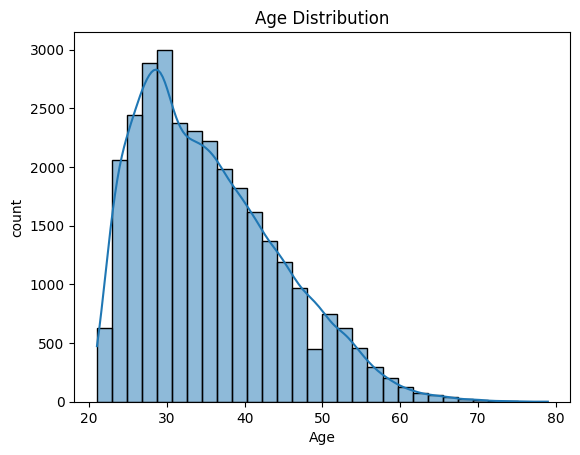

In [ ]:
sns.histplot(df['AGE'],bins = 30, kde=True)
plt.title('Age Distribution')                  # this code shows the distribution of customers age
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

by seeing the graph we can way that large peak shows that there are how many number of people ofthe perticular age by graph we can se that 25-35 aged people that mean there are most of the young adults in dataset


---

the distribution shape is notperfectly but little bit normaly distributed


# we going to separate features and target variable

In [ ]:
X = df.drop('default.payment.next.month',axis=1)
Y = df['default.payment.next.month']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df.shape

(30000, 24)

In [ ]:
X_train.shape

(24000, 23)

In [ ]:
Y_train.shape

(24000,)

# BUILDING MACHINE LEARNING MODEL
1st logistic reggression

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled,Y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)


In [ ]:
accuracy

0.81

In [ ]:
report = classification_report(Y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



BALANCING THE **DATASET**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled, Y_train)

data is imbalanced in minority and majority class because of this machine learning model becomes better while predicting and it ignore the minority class thats why we use smote to balance the data so that our model can also learn the minority class

# RETRAINING LOGISTIC REGRESSION WITH BALANCED DATA

In [ ]:
model = LogisticRegression()
model.fit(X_train_resampled, Y_train_resampled)

LogisticRegression()

In [ ]:
y_pred_resampled = model.predict(X_test_scaled)

In [ ]:
y_pred_resampled

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
accuracy = accuracy_score(Y_test, y_pred_resampled)
print("Accuracy:", accuracy)

Accuracy: 0.6848333333333333


In [ ]:
report = classification_report(Y_test, y_pred_resampled)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.37      0.66      0.48      1313

    accuracy                           0.68      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.77      0.68      0.71      6000



1st point **Recall** for Class 1 (Default): The recall for the minority class (default) is 0.64. This indicates that the model correctly identified 64% of the actual defaulters. This is a significant improvement compared to the recall of 0.25 before applying SMOTE, showing that oversampling has improved the model's ability to detect the minority class.




---


---






2nd point **Precision** for Class 1 (Default): The
precision for Class 1 is 0.37. This means that when the model predicted a default, it was correct 37% of the time. The lower precision suggests that the model also incorrectly predicted some non-defaulters as defaulters (false positives).


---


---



3rd point **Accuracy**: The overall accuracy is 0.68. It's important to note that accuracy can be misleading in imbalanced datasets, and recall and precision provide a more informative view, especially for the minority class



# **EXPLORING DIFFRENT ALGORITHMS**

# 1st decison tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, Y_train_resampled)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test_scaled)

In [ ]:
y_pred_dt

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
report_dt = classification_report(Y_test, y_pred_dt)

In [ ]:
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("Classification Report\n", report_dt)

Decision Tree Classifier:
Accuracy: 0.6905
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.76      0.79      4687
           1       0.34      0.45      0.39      1313

    accuracy                           0.69      6000
   macro avg       0.59      0.60      0.59      6000
weighted avg       0.72      0.69      0.70      6000



### 1st Random Forest Classifier
Lets train a Random Forest Classifier on the balanced dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, Y_train_resampled)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
y_pred_rf

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
report_rf = classification_report(Y_test, y_pred_rf)

In [ ]:
print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Classification Report\n", report_rf)

Random Forest Classifier:
Accuracy: 0.7935
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4687
           1       0.53      0.46      0.49      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000



### 3rd Support Vector Machine
Lets train an SVM Classifier on the balanced dataset

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_resampled, Y_train_resampled)


SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred_svm)
report_svm = classification_report(Y_test, y_pred_svm)

In [ ]:
print("SVM Classifier:")
print("Accuracy:", accuracy)
print("Classification Report\n", report_svm)

SVM Classifier:
Accuracy: 0.7615
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      4687
           1       0.46      0.56      0.50      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.69      0.67      6000
weighted avg       0.78      0.76      0.77      6000



4th gradient boosting

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled, Y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_gb = gb_model.predict(X_test_scaled)

In [ ]:
accuracy_gb = accuracy_score(Y_test, y_pred_gb)
report_gb = classification_report(Y_test, y_pred_gb)

In [ ]:
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_gb)
print("Classification Report\n", report_gb)

Gradient Boosting Classifier:
Accuracy: 0.7955
Classification Report
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      4687
           1       0.53      0.51      0.52      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.69      0.70      6000
weighted avg       0.79      0.80      0.79      6000



5th xgb classifier

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, Y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [ ]:
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
report_xgb = classification_report(Y_test, y_pred_xgb)


In [ ]:
print("XGBoost Classifier:")
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", report_xgb)

XGBoost Classifier:
Accuracy: 0.8075
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4687
           1       0.58      0.42      0.49      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.68      6000
weighted avg       0.79      0.81      0.80      6000



#AS WE KNOW ALL THE MODEL ARE TRAINED WITHOUT FEATURE IMPORTANCE NOW LETS SEE THE RESULT OF THE MODEL AFTER THE FEATURE IMPORTANCE

**FEATURE IMPORTANCE**

as mentioned in problem statement our goal is to predict the customer who cas deafult for the next month
(default.payment.next.month) so that we can minimize the finanacial loss
by reading this goal we can say that recall for class 1(Default) is so important because recall tell as that how much actual default are correctly pridicted by the model
if recall is low then high risk customer got missed and the we can face the unexpected loss
with that precious is also important so that we do not assume got customer as high risk
# as we saw recall in logistic is high that mean it identify most of the actual defaulters but the precision of logistic is not that good on other hand XGboost and gradient boosting are good with precision and better overall accuracy but there class 1 (defaulters) recall is less then logistics



feature importance


In [ ]:
rf_model_importance = RandomForestClassifier(random_state=42)
rf_model_importance.fit(X_train_resampled, Y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
feature_importances_rf = rf_model_importance.feature_importances_

In [ ]:
feature_importance_series_rf = pd.Series(feature_importances_rf, index=X_train.columns)
sorted_feature_importances_rf = feature_importance_series_rf.sort_values(ascending=False)

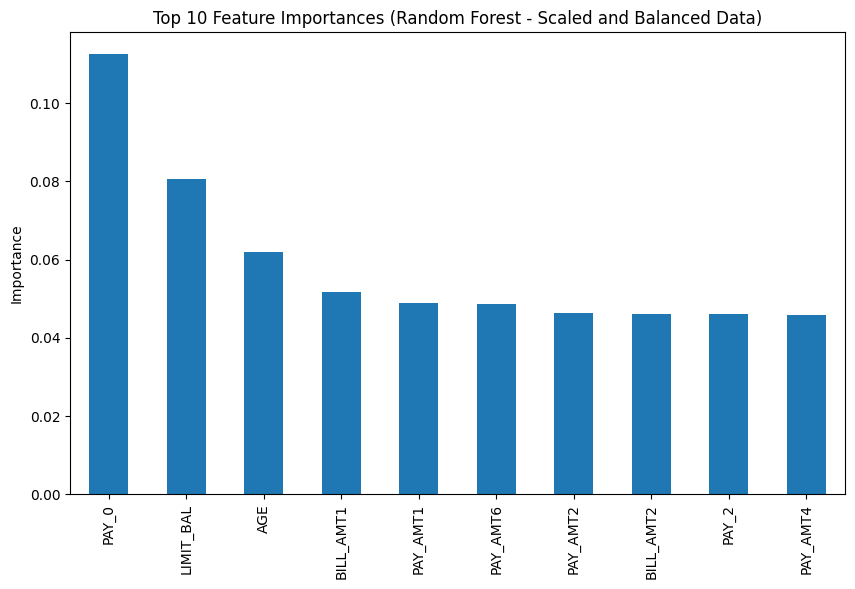

In [ ]:
plt.figure(figsize=(10, 6))
sorted_feature_importances_rf.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances (Random Forest - Scaled and Balanced Data)') # ploting top 10 features
plt.ylabel('Importance')
plt.show()

#RETRAING THE LOGISTIC REGRRESION WITH TOP 10 FEATURES

In [ ]:
top_10_features_rf = sorted_feature_importances_rf.head(10).index.tolist()

In [ ]:
X_train_top10_rf = X_train_resampled[:, [X.columns.get_loc(col) for col in top_10_features_rf]]
X_test_top10_rf = X_test_scaled[:, [X.columns.get_loc(col) for col in top_10_features_rf]]

In [ ]:
model_top10_rf = LogisticRegression()
model_top10_rf.fit(X_train_top10_rf, Y_train_resampled)

LogisticRegression()

In [ ]:
y_pred_top10_rf = model_top10_rf.predict(X_test_top10_rf)

In [ ]:
accuracy_top10_rf = accuracy_score(Y_test, y_pred_top10_rf)
report_top10_rf = classification_report(Y_test, y_pred_top10_rf)

In [ ]:
print("Logistic Regression with Top 10 Features from Random Forest:")
print("Accuracy:", accuracy_top10_rf)
print("Classification Report:\n", report_top10_rf)

Logistic Regression with Top 10 Features from Random Forest:
Accuracy: 0.6885
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78      4687
           1       0.38      0.64      0.47      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.77      0.69      0.71      6000



# COMPARING BOTH THE MODELS OF LOGISTICS TOP FEATURES AND ALL FEATURES

by comaparing both the models recall for class 1 is better in 1st logistic model by the problem statement we have to predict default so we going to focus on class 1


1.   Logistic Regression with All Features ka recall for Class 1 0.66


---


2.  Logistic Regression with Top 10 Features from Random Forest ka recall for Class 1 0.64

according to our problem statement we have to predict the defaulters by keeping this in mind we have to consider logistic regression with all features



# we can se that logistic regression is not giving good result after doing balancing and and even after trainting it with top 10 features

---
now one thing i did observe doing that data is not normaly distributed now im going to normalize the data and train again the logistic regression


In [ ]:
bill_amt_cols = [f'BILL_AMT{i}' for i in range(1, 7)]
pay_amt_cols = [f'PAY_AMT{i}' for i in range(1, 7)]
for col in bill_amt_cols + pay_amt_cols:       # Apply log transformation to BILL_AMT and PAY_AMT columns
    df[col] = np.log1p(df[col])

display(df.head())

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.000000,0.000000,0.000000,0.000000,6.536692,0.000000,0.000000,0.000000,0.000000,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,8.093462,8.147867,8.090096,0.000000,6.908755,6.908755,6.908755,0.000000,7.601402,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,9.570250,9.612400,9.651816,7.325808,7.313887,6.908755,6.908755,6.908755,8.517393,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,10.251147,10.273671,10.293771,7.601402,7.610853,7.090910,7.003974,6.975414,6.908755,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,9.949464,9.859901,9.859118,7.601402,10.510041,9.210440,9.105091,6.536692,6.522093,0


# NOW WE GOING TO CHEACK THE DISTRIBUTION AGAIN
using histplot

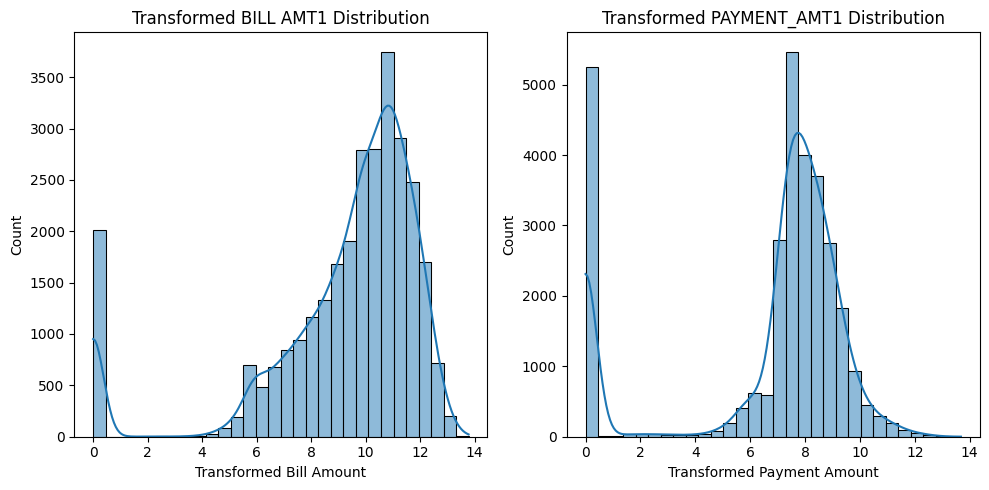

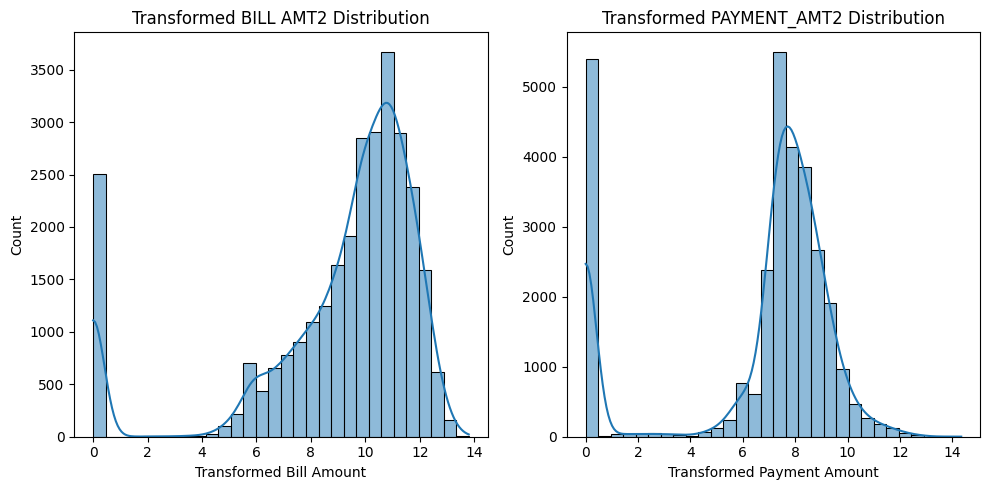

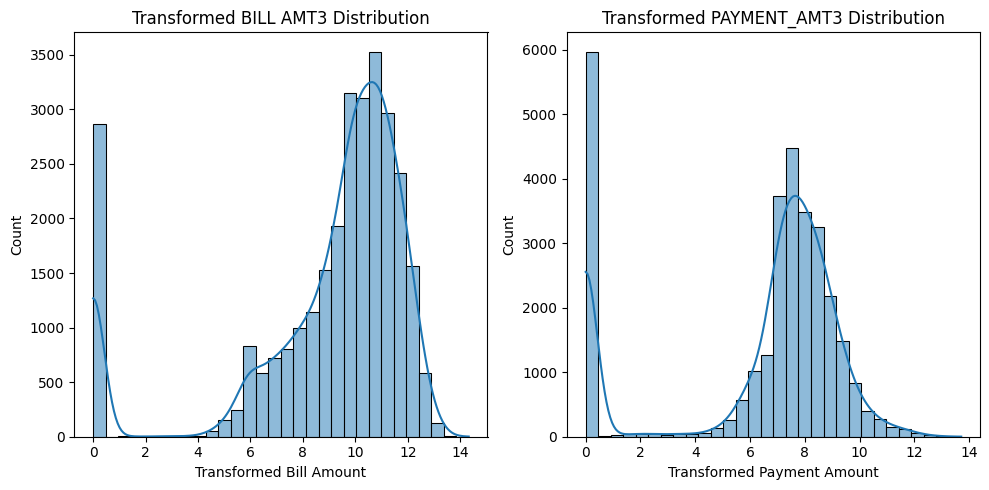

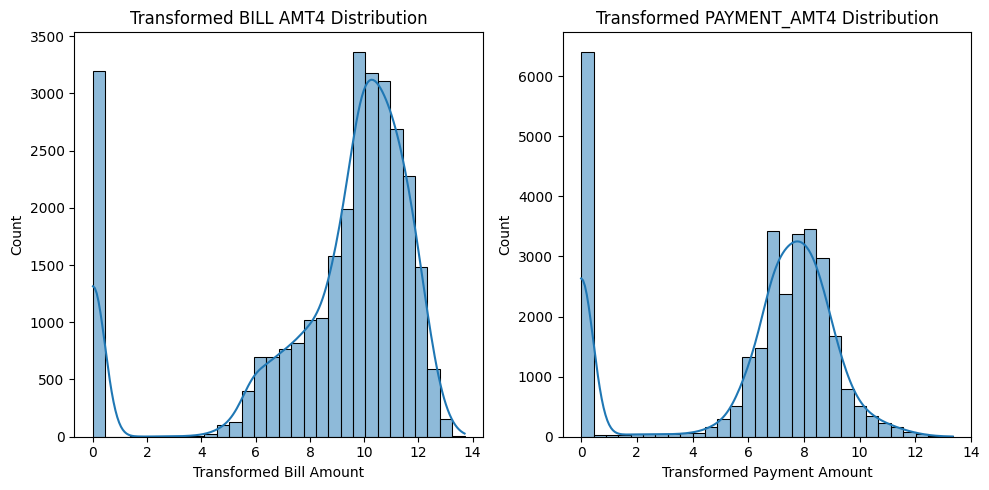

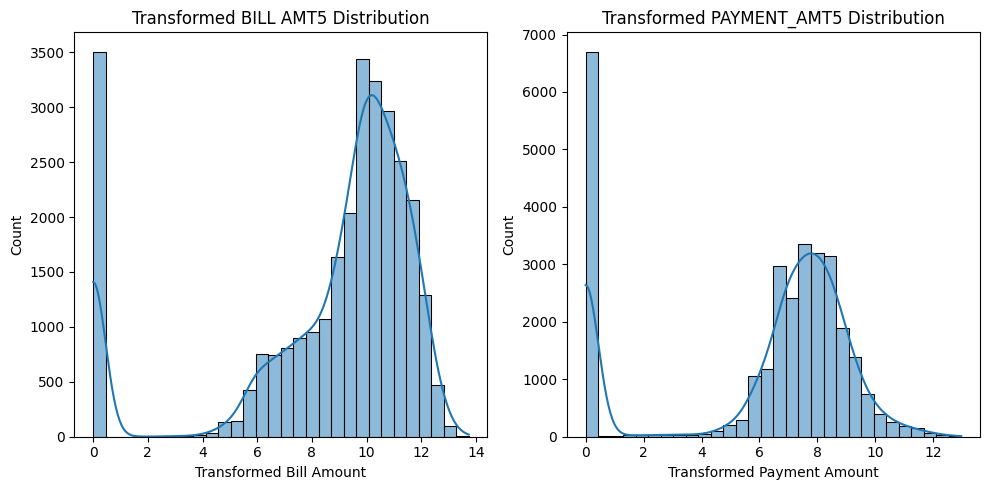

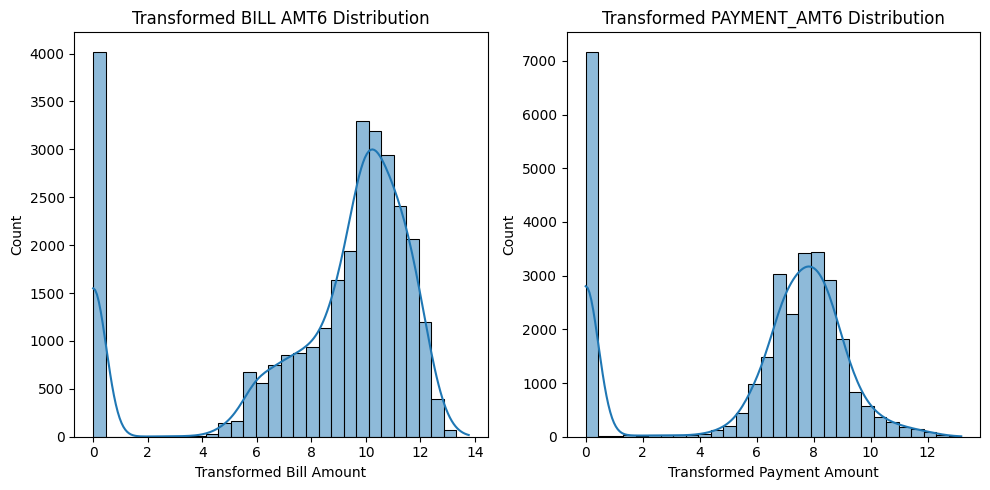

In [ ]:
for i in range(1, 7):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[f'BILL_AMT{i}'], bins=30, kde=True)
    plt.title(f'Transformed BILL AMT{i} Distribution')
    plt.xlabel('Transformed Bill Amount')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.histplot(df[f'PAY_AMT{i}'], bins=30, kde=True)
    plt.title(f'Transformed PAYMENT_AMT{i} Distribution')
    plt.xlabel('Transformed Payment Amount')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

after applyiing log transformer we can see that bill_amt and pay_amt are more symetrical right akwed is fix mostly

this graph shows that log tranformer normalize the data but the impact on zero is still visible  

it did not impact on zero because log transformer keeps zero values zero for the entries where bill amount or payment amount zero